[Тестирование модели](#тестирование-модели)

## Загрузка данных и общая информация

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer

from lightgbm import LGBMClassifier

from imblearn.combine import SMOTETomek

In [2]:
# открываем файлы
sample = pd.read_csv(f'C:\\Users\\Anna\\Desktop\\Python\\Хакатон Ярославль 2022\\sample_solution.csv', index_col='ID')
train = pd.read_csv(f'C:\\Users\\Anna\\Desktop\\Python\\Хакатон Ярославль 2022\\train.csv', index_col='ID')
test = pd.read_csv(f'C:\\Users\\Anna\\Desktop\\Python\\Хакатон Ярославль 2022\\test_dataset_test.csv', index_col='ID')

In [3]:
# смотрим общее инфо о датасете train и первые 5 строк
train.info()
display(train.head())
print('Количество дублированных строк:', sum(train.duplicated()))

<class 'pandas.core.frame.DataFrame'>
Index: 955 entries, 54-102-358-02 to 54-702-016-01
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Пол                                    954 non-null    object 
 1   Семья                                  955 non-null    object 
 2   Этнос                                  955 non-null    object 
 3   Национальность                         955 non-null    object 
 4   Религия                                955 non-null    object 
 5   Образование                            955 non-null    object 
 6   Профессия                              955 non-null    object 
 7   Вы работаете?                          955 non-null    int64  
 8   Выход на пенсию                        955 non-null    int64  
 9   Прекращение работы по болезни          955 non-null    int64  
 10  Сахарный диабет                        955 non-null    in

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,...,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",ID_y,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
ID,,,,,,,,,,,,,,,,,,,,,
54-102-358-02,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,0,...,06:00:00,0,0,0,54-102-358-02,0,0,0,0,0
54-103-101-01,Ж,в разводе,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,...,04:00:00,1,0,0,54-103-101-01,1,1,0,0,0
54-501-026-03,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,...,07:00:00,0,0,0,54-501-026-03,0,0,0,0,0
54-501-094-02,М,в браке в настоящее время,европейская,Русские,Атеист / агностик,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,0,...,07:00:00,0,0,0,54-501-094-02,1,0,0,0,0
54-503-022-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,операторы и монтажники установок и машинного о...,0,0,1,...,06:00:00,0,0,0,54-503-022-01,1,0,1,1,0


Количество дублированных строк: 0


In [4]:
# смотрим общее инфо о датасете test и первые 5 строк
test.info()
display(test.head())

<class 'pandas.core.frame.DataFrame'>
Index: 638 entries, 54-001-019-01 to 54-103-022-01
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Пол                                    638 non-null    object 
 1   Семья                                  638 non-null    object 
 2   Этнос                                  638 non-null    object 
 3   Национальность                         638 non-null    object 
 4   Религия                                638 non-null    object 
 5   Образование                            638 non-null    object 
 6   Профессия                              638 non-null    object 
 7   Вы работаете?                          638 non-null    int64  
 8   Выход на пенсию                        638 non-null    int64  
 9   Прекращение работы по болезни          638 non-null    int64  
 10  Сахарный диабет                        638 non-null    in

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,...,Сигарет в день,Пассивное курение,Частота пасс кур,Алкоголь,Возраст алког,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы"
ID,,,,,,,,,,,,,,,,,,,,,
54-001-019-01,Ж,вдовец / вдова,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,ремесленники и представители других отраслей п...,1,0,0,...,NaN,0,NaN,употребляю в настоящее время,23.0,21:30:00,05:00:00,0,1,1
54-002-133-01,Ж,в разводе,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,1,0,...,NaN,0,NaN,употребляю в настоящее время,22.0,00:00:00,09:00:00,0,0,0
54-001-007-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,1,0,...,NaN,0,NaN,употребляю в настоящее время,18.0,23:00:00,07:30:00,0,0,0
54-102-116-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,4 - профессиональное училище,низкоквалифицированные работники,1,0,0,...,NaN,0,NaN,никогда не употреблял,NaN,22:00:00,06:00:00,0,0,0
54-502-005-02,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,операторы и монтажники установок и машинного о...,0,1,0,...,20.0,0,NaN,употребляю в настоящее время,19.0,22:00:00,06:00:00,0,0,0


* В таблицах 955 и 638 строк, а также 38 и 36 колонок, соответственно. Из них 5 - целевые признаки:
    * `Артериальная гипертензия`
    * `ОНМК`
    * `Стенокардия, ИБС, инфаркт миокарда`
    * `Сердечная недостаточность`
    * `Прочие заболевания сердца`
* Встречаются пропуски, их необходимо заполнить.
* Есть столбец `'ID_y'`, который дублирует столбец `'ID'`. Следует удалить его.
* Типы данных в столбцах 'Время засыпания' и 'Время пробуждения' нужно привести к временному типу данных.

## Предобработка данных

* Объединим таблицы `train` и `test` для предобработки признаков, затем разделим их обратно.

In [5]:
merged_df = pd.concat((train, test))

In [6]:
# удаляем дублирующий столбец 'ID_y'
merged_df = merged_df.drop('ID_y', axis=1)

In [7]:
# отфильтруем пропуски по столбцу 'Возраст курения'
filtred_df = merged_df.loc[merged_df['Возраст курения'].isna(), ['Статус Курения', 'Возраст курения', 'Сигарет в день']]
filtred_df

,Статус Курения,Возраст курения,Сигарет в день
ID,,,
54-103-101-01,Никогда не курил(а),NaN,NaN
54-501-026-03,Никогда не курил(а),NaN,NaN
54-503-022-01,Никогда не курил(а),NaN,NaN
54-002-074-01,Никогда не курил(а),NaN,NaN
54-602-027-01,Никогда не курил(а),NaN,NaN
...,...,...,...
54-102-095-01,Никогда не курил(а),NaN,NaN
54-102-235-01,Никогда не курил(а),NaN,NaN
54-502-016-01,Никогда не курил(а),NaN,NaN


In [8]:
filtred_df['Статус Курения'].unique()

array(['Никогда не курил(а)', 'Никогда не курил'], dtype=object)

In [9]:
# пустые значнния для столбца 'Возраст курения' заменяем нулями, 
# так как для таких строк в статусе курения указано 'Никогда не курил(а)'
merged_df['Возраст курения'].fillna(0, inplace=True)

In [10]:
# заменяем найденный дубликат
merged_df.loc[merged_df['Статус Курения'] == 'Никогда не курил', 'Статус Курения'] = 'Никогда не курил(а)'

In [11]:
# пустые значения по столбцу 'Сигарет в день' заполним 0 для строк, в которых 'Возраст курения' == 0
merged_df.loc[merged_df['Возраст курения'] == 0, 'Сигарет в день'] = merged_df.loc[merged_df['Возраст курения'] == 0, 'Сигарет в день'].fillna(0)

In [12]:
# отфильтруем оставшиеся пропуски по столбцу 'Сигарет в день'
filtred_df = merged_df.loc[merged_df['Сигарет в день'].isna(), ['Статус Курения', 
                                                                'Возраст курения', 
                                                                'Сигарет в день']]
filtred_df

,Статус Курения,Возраст курения,Сигарет в день
ID,,,
54-102-244-02,Бросил(а),18.0,NaN
54-601-015-02,Курит,25.0,NaN
54-602-038-01,Курит,52.0,NaN
54-103-105-01,Бросил(а),16.0,NaN
54-501-014-02,Бросил(а),18.0,NaN
54-001-087-01,Курит,8.0,NaN
54-002-115-02,Бросил(а),12.0,NaN


* По объектам со статусом курения `'Бросил(а)'` вероятно значение пропущено, так как человек, заполнявший анкету, в данный момент времени не курит и оставил поле пустым. Однако, стаж курения у них присутствует, заполним пропуск в признаке медианным значением.
* Другие наблюдения также заполним медианным значением.

In [13]:
# заполняем пропуски в столбце 'Сигарет в день' медианным значением
median_cig_day = merged_df.loc[merged_df['Сигарет в день'] != 0, 'Сигарет в день'].median()
merged_df['Сигарет в день'].fillna(median_cig_day, inplace=True)

In [14]:
# отфильтруем пропуски по столбцу 'Частота пасс кур'
filtred_df = merged_df.loc[merged_df['Частота пасс кур'].isna(), ['Пассивное курение', 
                                                                  'Частота пасс кур']]
filtred_df

,Пассивное курение,Частота пасс кур
ID,,
54-102-358-02,0,NaN
54-103-101-01,0,NaN
54-002-074-01,0,NaN
54-602-027-01,0,NaN
54-102-145-01,0,NaN
...,...,...
54-102-334-01,0,NaN
54-102-356-02,0,NaN
54-102-095-01,0,NaN


In [15]:
# пустые значения по столбцу 'Частота пасс кур' заполним 0 для строк, в которых 'Пассивное курение' == 0
merged_df.loc[merged_df['Пассивное курение'] == 0, 'Частота пасс кур'] = merged_df.loc[merged_df['Пассивное курение'] == 0, 'Частота пасс кур'].fillna(0)

In [16]:
# оставшиеся пропуски заполним наиболее часто встречающимся значением
common_pass_smoking = merged_df.loc[merged_df['Частота пасс кур'] != 0, 'Частота пасс кур'].value_counts().sort_values(ascending=False).index[0]
merged_df['Частота пасс кур'].fillna(common_pass_smoking, inplace=True)

In [17]:
# отфильтруем пропуски по столбцу 'Возраст алког'
filtred_df = merged_df.loc[merged_df['Возраст алког'].isna(), ['Алкоголь', 'Возраст алког']]
filtred_df

,Алкоголь,Возраст алког
ID,,
54-103-101-01,никогда не употреблял,NaN
54-602-027-01,никогда не употреблял,NaN
54-102-011-01,никогда не употреблял,NaN
54-501-011-01,никогда не употреблял,NaN
54-102-234-02,никогда не употреблял,NaN
...,...,...
54-102-105-01,никогда не употреблял,NaN
54-602-042-01,никогда не употреблял,NaN
54-102-300-02,никогда не употреблял,NaN


In [18]:
# пустые значения по столбцу 'Возраст алког' заполним 0 для строк, в которых 'Алкоголь' == 0
merged_df.loc[merged_df['Алкоголь'] == 'никогда не употреблял', 'Возраст алког'] = merged_df.loc[merged_df['Алкоголь'] == 'никогда не употреблял', 'Возраст алког'].fillna(0)

In [19]:
# оставшиеся пропуски заполним медианным значением
median_alc_age = merged_df.loc[merged_df['Возраст алког'] != 0, 'Возраст алког'].median()
merged_df['Возраст алког'].fillna(median_alc_age, inplace=True)

In [20]:
# единственный пропуск по колонке пол не будем заполнять, просто удалим одно наблюдение из датасета
# *данный пропуск принадлежит к обучающему датасету
merged_df.drop(merged_df[merged_df['Пол'].isna()].index, axis=0, inplace=True)

In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1592 entries, 54-102-358-02 to 54-103-022-01
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Пол                                    1592 non-null   object 
 1   Семья                                  1592 non-null   object 
 2   Этнос                                  1592 non-null   object 
 3   Национальность                         1592 non-null   object 
 4   Религия                                1592 non-null   object 
 5   Образование                            1592 non-null   object 
 6   Профессия                              1592 non-null   object 
 7   Вы работаете?                          1592 non-null   int64  
 8   Выход на пенсию                        1592 non-null   int64  
 9   Прекращение работы по болезни          1592 non-null   int64  
 10  Сахарный диабет                        1592 non-null   i

* Проверим выбросы по количественным признакам.

C:\Programs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Programs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Programs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


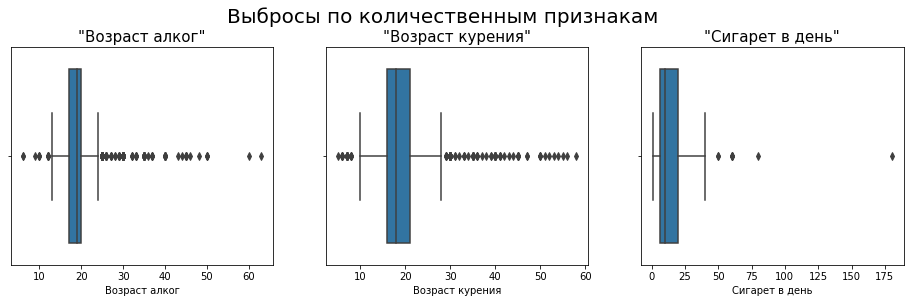

In [22]:
fig = plt.figure(figsize=(16,4))
fig.suptitle('Выбросы по количественным признакам', fontsize=20, y=1.02)

ax1 = plt.subplot(131)
sns.boxplot(merged_df.loc[merged_df['Возраст алког'] != 0, 'Возраст алког'])
ax1.set_title('"Возраст алког"', fontsize=15)

ax2 = plt.subplot(132)
sns.boxplot(merged_df.loc[merged_df['Возраст курения'] != 0, 'Возраст курения'])
ax2.set_title('"Возраст курения"', fontsize=15)

ax3 = plt.subplot(133)
sns.boxplot(merged_df.loc[merged_df['Сигарет в день'] != 0, 'Сигарет в день'])
ax3.set_title('"Сигарет в день"', fontsize=15)
plt.show()

* Данные имеют выбросы. Есть экстремальное значение для признака `'Сигарет в день'` в 175 шт.
* Удалим 1% значений с правой стороны для обучающих данных. С левой стороны данные правдоподобны, 0 означает, что человек не употребляет алкоголь и не курит.

In [23]:
# находим 99-й квантиль значений
print(round(merged_df['Возраст алког'].quantile(0.99), 1))
print(round(merged_df['Возраст курения'].quantile(0.99), 1))
print(round(merged_df['Сигарет в день'].quantile(0.99), 1))

40.0
45.0
40.0


## Обучение модели

### Подготовка признаков

In [24]:
# делим выборку обратно на тестовую и обучающую
train = merged_df[merged_df['Артериальная гипертензия'].notnull()]
test = merged_df[merged_df['Артериальная гипертензия'].isna()].drop(['Артериальная гипертензия', 
                                                                     'ОНМК', 
                                                                     'Стенокардия, ИБС, инфаркт миокарда', 
                                                                     'Сердечная недостаточность', 
                                                                     'Прочие заболевания сердца'], axis=1)

In [25]:
# удаляем 1% значений справа
train = train.loc[(train['Возраст алког'] <= round(merged_df['Возраст алког'].quantile(0.99), 1)) & 
                  (train['Возраст курения'] <= round(merged_df['Возраст курения'].quantile(0.99), 1)) & 
                  (train['Сигарет в день'] <= round(merged_df['Сигарет в день'].quantile(0.99), 1))]

In [26]:
# разбиваем признаки на целевой и нецелевые
target = train[['Артериальная гипертензия', 
                'ОНМК', 
                'Стенокардия, ИБС, инфаркт миокарда', 
                'Сердечная недостаточность', 
                'Прочие заболевания сердца']]
features = train.drop(['Артериальная гипертензия', 
                       'ОНМК', 
                       'Стенокардия, ИБС, инфаркт миокарда', 
                       'Сердечная недостаточность', 
                       'Прочие заболевания сердца'], axis=1)

In [27]:
# удаляем признак 'Национальность', так как размер групп сильно не сбалансирован (по большинству групп 1-2 наблюдения)
features.drop('Национальность', axis = 1, inplace=True)
test.drop('Национальность', axis = 1, inplace=True)

In [28]:
# считаем столбец с данными сколько выкурено сигарет всего и удаляем 'Возраст курения', 'Сигарет в день', 'Статус Курения'
features['total_sig'] = features['Возраст курения'] * features['Сигарет в день']
features.drop(['Возраст курения', 'Сигарет в день', 'Статус Курения'], axis = 1, inplace=True)

test['total_sig'] = test['Возраст курения'] * test['Сигарет в день']
test.drop(['Возраст курения', 'Сигарет в день', 'Статус Курения'], axis = 1, inplace=True)

In [29]:
# удаляем признак 'Пассивное курение', так как есть признак, содержащий ту же информацию 'Частота пасс кур'
features.drop('Пассивное курение', axis = 1, inplace=True)
test.drop('Пассивное курение', axis = 1, inplace=True)

In [30]:
# удаляем признак 'Алкоголь', так как есть признак, содержащий ту же информацию 'Возраст алког'
features.drop('Алкоголь', axis = 1, inplace=True)
test.drop('Алкоголь', axis = 1, inplace=True)

In [31]:
# заменим пол бинарным значением 1 == 'М', 0 == 'Ж'
features['Пол'] = 1 * (features['Пол'] == 'М')
test['Пол'] = 1 * (test['Пол'] == 'М')

* Время пробуждения и Время засыпания не информативные признаки, так как в соответствии с научными исследованиями, время пробуждения и засыпания само по себе не влияет на организм человека. Более важный признак, который мы можем получить - Время сна.
* На основании имеющихся данных о времени засыпания и пробуждения найдем время сна и выделим его в отдельный признак. Признаки Время пробуждения и Время засыпания удалим из данных.

In [32]:
# добавляем колонку 'Время сна' и удаляем 'Время пробуждения', 'Время засыпания' для трайн таблицы
features['Время пробуждения'] = pd.to_datetime(features['Время пробуждения'], format='%H:%M:%S')
features['Время засыпания'] = pd.to_datetime(features['Время засыпания'], format='%H:%M:%S')
features['Время сна'] = features['Время пробуждения'] - features['Время засыпания']
features['Время сна'] = features['Время сна'].apply(lambda x: 
                                                    divmod(x.seconds, 3600)[0] if (divmod(x.seconds, 3600)[1] < 1800) 
                                                    else divmod(x.seconds, 3600)[0] +1)
features.drop(['Время пробуждения', 'Время засыпания'],axis = 1, inplace=True)

In [33]:
# добавляем колонку 'Время сна' и удаляем 'Время пробуждения', 'Время засыпания' для тестовой таблицы
test['Время пробуждения'] = pd.to_datetime(test['Время пробуждения'], format='%H:%M:%S')
test['Время засыпания'] = pd.to_datetime(test['Время засыпания'], format='%H:%M:%S')
test['Время сна'] = test['Время пробуждения'] - test['Время засыпания']
test['Время сна'] = test['Время сна'].apply(lambda x: 
                                            divmod(x.seconds, 3600)[0] if (divmod(x.seconds, 3600)[1] < 1800) 
                                            else divmod(x.seconds, 3600)[0] +1)
test.drop(['Время пробуждения', 'Время засыпания'],axis = 1, inplace=True)

### Поиск оптимальной модели

* Среди признаков найдем наиболее коррелирующие с целевым признаком. Строить модель будем на них, остальные отбросим.
* Проверим модели ***Дерево решений, Случайный лес, LightGBM.***
    * Подбор гиперпараметров будем осуществлять с помощью инструмента `gridsearch` библиотеки `sklearn`.
    * При поиске гиперпараметров будем использовать метрику `roc_auc`.
* После нахождения оптимальных гиперпараметров будем проводить кросс-валидацию по метрике `recall` и выберем модель с наибольшим значением.

#### Артериальная гипертензия

In [34]:
# находим наиболее коррелирующие признаки
(pd.concat((target['Артериальная гипертензия'], features), axis=1)
 .corr()
 .sort_values(by = 'Артериальная гипертензия', ascending = False)
 .style.background_gradient(cmap = 'coolwarm'))

,Артериальная гипертензия,Пол,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прим лекарственных средств,Травмы за год,Переломы,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",total_sig,Время сна
Артериальная гипертензия,1.000000,-0.125678,-0.222921,0.257735,0.046089,0.237305,-0.032938,0.088057,0.069330,0.099969,0.017947,-0.043092,0.452170,0.017076,0.091106,0.004839,0.064062,-0.009875,-0.031292,-0.048944,0.043272
Регулярный прим лекарственных средств,0.452170,-0.195812,-0.212777,0.226125,0.087017,0.234775,0.020680,0.075465,0.059412,0.102451,-0.003367,0.034515,1.000000,0.018462,0.044518,0.010708,0.030088,0.037027,-0.016804,-0.095040,0.082973
Выход на пенсию,0.257735,-0.160006,-0.745978,1.000000,-0.067054,0.183107,-0.052299,0.119706,-0.003730,0.062826,-0.021852,-0.032844,0.226125,-0.007434,0.070542,-0.015563,0.115049,0.019966,0.009499,-0.114966,0.073543
Сахарный диабет,0.237305,-0.051947,-0.146095,0.183107,0.018152,1.000000,-0.009194,0.059625,-0.058270,0.030312,0.024346,-0.015933,0.234775,-0.050895,0.001199,0.057318,0.169314,0.028942,-0.007554,-0.013218,0.008149
Бронжиальная астма,0.099969,-0.058317,-0.063559,0.062826,0.000784,0.030312,0.019671,0.005185,0.221012,1.000000,0.044469,-0.009788,0.102451,0.020225,0.021306,0.019694,-0.023117,0.025337,-0.032817,-0.086596,-0.038524
Переломы,0.091106,0.130641,-0.057267,0.070542,0.008428,0.001199,0.038558,-0.051669,0.062709,0.021306,0.052609,0.014361,0.044518,0.163318,1.000000,0.018136,0.040605,-0.007676,0.003824,0.055850,-0.026757
Онкология,0.088057,-0.063762,-0.134998,0.119706,0.070040,0.059625,0.047213,1.000000,-0.002833,0.005185,-0.031234,-0.010041,0.075465,-0.005646,-0.051669,-0.035176,-0.003158,-0.018674,0.068532,-0.053568,0.029953
Хроническое заболевание легких,0.069330,-0.000994,0.001958,-0.003730,0.010450,-0.058270,0.032728,-0.002833,1.000000,0.221012,0.218252,0.074792,0.059412,0.058827,0.062709,-0.023082,0.015468,0.034093,0.063084,0.071838,-0.102109
Сон после обеда,0.064062,0.066737,-0.145608,0.115049,0.069979,0.169314,-0.013319,-0.003158,0.015468,-0.023117,0.033174,-0.024612,0.030088,0.022756,0.040605,-0.011083,1.000000,-0.053986,-0.048469,0.043911,-0.020697
Прекращение работы по болезни,0.046089,0.012134,-0.239209,-0.067054,1.000000,0.018152,0.022689,0.070040,0.010450,0.000784,0.037334,0.096503,0.087017,-0.010108,0.008428,-0.036671,0.069979,-0.042733,0.062561,0.010076,0.027427


In [35]:
# удаляем признаки наименее коррелирующие с целевым (возьмем порог 0.05)
# также убираем признак 'Вы работаете?', так как он сильно коррелирует с признаком 'Выход на пенсию'
cols_to_drop = ['Туберкулез легких ', 
                'Травмы за год', 
                'Возраст алког', 
                'Спорт, клубы', 
                'Религия, клубы', 
                'Гепатит',  
                'Вы работаете?',
                'Прекращение работы по болезни',
                'Время сна', 
                'ВИЧ/СПИД',
                'total_sig'
               ]

features_1 = features.drop(cols_to_drop, axis=1)
features_test_1 = test.drop(cols_to_drop, axis=1)

In [36]:
# кодируем категориальные признаки с помощью LeaveOneOutEncoder
cat_features = list(features_1.select_dtypes(include='object').columns)

loo_enc = ce.LeaveOneOutEncoder(cols=cat_features)
loo_enc.fit(features_1, target['Артериальная гипертензия'])
features_1 = loo_enc.transform(features_1)
features_test_1 = loo_enc.transform(features_test_1)

In [37]:
# масштабируем признаки
scaler = StandardScaler()
scaler.fit(features_1)
features_1 = scaler.transform(features_1)
features_test_1 = scaler.transform(features_test_1)

In [38]:
# сохраняем модели и их параметры для GridSearchCV
models = {DecisionTreeClassifier(): {'criterion': ['gini', 'entropy', 'log_loss'],
                                     'max_depth': range(2, 11),
                                     'min_samples_split': range(2, 5), 
                                     'min_samples_leaf': range(1, 6), 
                                     'random_state': [1505]},
          
          RandomForestClassifier(): {'n_estimators': range(2, 11),
                                     'max_depth': range(2, 6),
                                     'min_samples_split': range(2, 5), 
                                     'min_samples_leaf': range(1, 6), 
                                     'random_state': [1505]},
          
          LGBMClassifier(objective='binary'): {'n_estimators': range(10, 31, 2),
                                               'max_depth': range(2, 6),
                                               'num_leaves': range(2, 6),
                                               'learning_rate': [0.07, 0.1], 
                                               'random_state': [1505]}
         }

In [39]:
best_model =[None] * 5
best_params = [None] * 5
best_score = [0] * 5

f2 = make_scorer(fbeta_score, beta=2)

for model, params in models.items():
    
    # ищем оптимальные параметры через GridSearchCV
    grid_search = GridSearchCV(estimator = model, 
                               param_grid = params, 
                               cv = 5, 
                               n_jobs = -1, 
                               scoring = f2)
    grid_search.fit(features_1, target['Артериальная гипертензия'])
    
    # модель с лучшими параметрами кросс-валидируем по метрике Recall
    model = model.set_params(**grid_search.best_params_)
    score = cross_val_score(model, features_1, target['Артериальная гипертензия'], 
                            scoring = 'recall',
                            cv = 5,
                            n_jobs = -1).mean()
    
    # записываем модель с лучшей метрикой Recall
    if score > best_score[0]:
        best_model[0] = model
        best_params[0] = grid_search.best_params_
        best_score[0] = score

print(f'Лучшая модель: {type(best_model[0]).__name__}')
print(f'Параметры лучшей модели: {best_params[0]}')
print(f'Recall лучшей модели: {best_score[0]}')

Лучшая модель: DecisionTreeClassifier
Параметры лучшей модели: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 1505}
Recall лучшей модели: 0.8778936113338679


#### ОНМК

In [40]:
# находим наиболее коррелирующие признаки
(pd.concat((target['ОНМК'], features), axis=1)
 .corr()
 .sort_values(by = 'ОНМК', ascending = False)
 .style.background_gradient(cmap = 'coolwarm'))

,ОНМК,Пол,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прим лекарственных средств,Травмы за год,Переломы,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",total_sig,Время сна
ОНМК,1.000000,0.079871,-0.074143,0.051626,0.098530,0.047490,-0.029158,0.005185,0.000107,-0.044693,-0.030447,-0.009788,0.113481,-0.003266,0.076642,0.050521,0.078898,0.025337,-0.032817,0.015166,0.033122
Регулярный прим лекарственных средств,0.113481,-0.195812,-0.212777,0.226125,0.087017,0.234775,0.020680,0.075465,0.059412,0.102451,-0.003367,0.034515,1.000000,0.018462,0.044518,0.010708,0.030088,0.037027,-0.016804,-0.095040,0.082973
Прекращение работы по болезни,0.098530,0.012134,-0.239209,-0.067054,1.000000,0.018152,0.022689,0.070040,0.010450,0.000784,0.037334,0.096503,0.087017,-0.010108,0.008428,-0.036671,0.069979,-0.042733,0.062561,0.010076,0.027427
Пол,0.079871,1.000000,0.181587,-0.160006,0.012134,-0.051947,0.001581,-0.063762,-0.000994,-0.058317,0.020967,0.020014,-0.195812,-0.021547,0.130641,0.085602,0.066737,-0.014699,-0.025141,0.463758,-0.022059
Сон после обеда,0.078898,0.066737,-0.145608,0.115049,0.069979,0.169314,-0.013319,-0.003158,0.015468,-0.023117,0.033174,-0.024612,0.030088,0.022756,0.040605,-0.011083,1.000000,-0.053986,-0.048469,0.043911,-0.020697
Переломы,0.076642,0.130641,-0.057267,0.070542,0.008428,0.001199,0.038558,-0.051669,0.062709,0.021306,0.052609,0.014361,0.044518,0.163318,1.000000,0.018136,0.040605,-0.007676,0.003824,0.055850,-0.026757
Выход на пенсию,0.051626,-0.160006,-0.745978,1.000000,-0.067054,0.183107,-0.052299,0.119706,-0.003730,0.062826,-0.021852,-0.032844,0.226125,-0.007434,0.070542,-0.015563,0.115049,0.019966,0.009499,-0.114966,0.073543
Возраст алког,0.050521,0.085602,0.034345,-0.015563,-0.036671,0.057318,0.044717,-0.035176,-0.023082,0.019694,-0.020825,0.015060,0.010708,0.017899,0.018136,1.000000,-0.011083,-0.029222,-0.086410,0.158606,0.073350
Сахарный диабет,0.047490,-0.051947,-0.146095,0.183107,0.018152,1.000000,-0.009194,0.059625,-0.058270,0.030312,0.024346,-0.015933,0.234775,-0.050895,0.001199,0.057318,0.169314,0.028942,-0.007554,-0.013218,0.008149
Время сна,0.033122,-0.022059,-0.094839,0.073543,0.027427,0.008149,0.021184,0.029953,-0.102109,-0.038524,-0.015584,0.036282,0.082973,-0.061841,-0.026757,0.073350,-0.020697,0.014678,-0.036178,-0.101965,1.000000


In [41]:
# удаляем признаки наименее коррелирующие с целевым (возьмем порог 0.05)
# также убираем признак 'Выход на пенсию', так как он сильно коррелирует с признаком 'Вы работаете?'
cols_to_drop = ['Время сна', 
                'Спорт, клубы', 
                'total_sig', 
                'Онкология', 
                'Хроническое заболевание легких', 
                'Травмы за год', 
                'ВИЧ/СПИД', 
                'Гепатит', 
                'Туберкулез легких ', 
                'Религия, клубы', 
                'Выход на пенсию', 
                'Сахарный диабет', 
                'Бронжиальная астма'
               ]

features_2 = features.drop(cols_to_drop, axis=1)
features_test_2 = test.drop(cols_to_drop, axis=1)

In [42]:
# кодируем категориальные признаки с помощью LeaveOneOutEncoder
cat_features = list(features_2.select_dtypes(include='object').columns)

loo_enc = ce.LeaveOneOutEncoder(cols=cat_features)
loo_enc.fit(features_2, target['ОНМК'])
features_2 = loo_enc.transform(features_2)
features_test_2 = loo_enc.transform(features_test_2)

In [43]:
# масштабируем признаки
scaler = StandardScaler()
scaler.fit(features_2)
features_2 = scaler.transform(features_2)
features_test_2 = scaler.transform(features_test_2)


In [44]:
smt = SMOTETomek(random_state=1505)
features_2, target_2 = smt.fit_resample(features_2, target['ОНМК'])

In [45]:
# сохраняем модели и их параметры для GridSearchCV
models = {DecisionTreeClassifier(): {'criterion': ['gini', 'entropy', 'log_loss'],
                                     'max_depth': range(2, 11),
                                     'min_samples_split': range(2, 5), 
                                     'min_samples_leaf': range(1, 6), 
                                     'random_state': [1505]},
          
          RandomForestClassifier(): {'n_estimators': range(2, 11),
                                     'max_depth': range(2, 6),
                                     'min_samples_split': range(2, 5), 
                                     'min_samples_leaf': range(1, 6), 
                                     'random_state': [1505]},
          
          LGBMClassifier(objective='binary'): {'n_estimators': range(10, 31, 2),
                                               'max_depth': range(2, 6),
                                               'num_leaves': range(2, 6),
                                               'learning_rate': [0.07, 0.1], 
                                               'random_state': [1505]}
         }

In [46]:
for model, params in models.items():
    
    # ищем оптимальные параметры через GridSearchCV
    grid_search = GridSearchCV(estimator = model, 
                               param_grid = params, 
                               cv = 5, 
                               n_jobs = -1, 
                               scoring = f2)
    grid_search.fit(features_2, target_2)
    
    # модель с лучшими параметрами кросс-валидируем по метрике Recall
    model = model.set_params(**grid_search.best_params_)
    score = cross_val_score(model, features_2, target_2, 
                            scoring = 'recall',
                            cv = 5,
                            n_jobs = -1).mean()
    
    # записываем модель с лучшей метрикой Recall
    if score > best_score[1]:
        best_model[1] = model
        best_params[1] = grid_search.best_params_
        best_score[1] = score

print(f'Лучшая модель: {type(best_model[1]).__name__}')
print(f'Параметры лучшей модели: {best_params[1]}')
print(f'Recall лучшей модели: {best_score[1]}')

Лучшая модель: RandomForestClassifier
Параметры лучшей модели: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 8, 'random_state': 1505}
Recall лучшей модели: 0.9743016759776536


#### Стенокардия, ИБС, инфаркт миокарда

In [47]:
# находим наиболее коррелирующие признаки
(pd.concat((target['Стенокардия, ИБС, инфаркт миокарда'], features), axis=1)
 .corr()
 .sort_values(by = 'Стенокардия, ИБС, инфаркт миокарда', ascending = False)
 .style.background_gradient(cmap = 'coolwarm'))

,"Стенокардия, ИБС, инфаркт миокарда",Пол,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прим лекарственных средств,Травмы за год,Переломы,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",total_sig,Время сна
"Стенокардия, ИБС, инфаркт миокарда",1.000000,0.002239,-0.204701,0.224289,0.080436,0.146303,-0.017805,0.044559,-0.007543,0.049567,0.061464,-0.017339,0.218013,-0.016642,0.071837,0.010951,0.044495,0.000068,-0.015165,-0.000940,-0.015545
Выход на пенсию,0.224289,-0.160006,-0.745978,1.000000,-0.067054,0.183107,-0.052299,0.119706,-0.003730,0.062826,-0.021852,-0.032844,0.226125,-0.007434,0.070542,-0.015563,0.115049,0.019966,0.009499,-0.114966,0.073543
Регулярный прим лекарственных средств,0.218013,-0.195812,-0.212777,0.226125,0.087017,0.234775,0.020680,0.075465,0.059412,0.102451,-0.003367,0.034515,1.000000,0.018462,0.044518,0.010708,0.030088,0.037027,-0.016804,-0.095040,0.082973
Сахарный диабет,0.146303,-0.051947,-0.146095,0.183107,0.018152,1.000000,-0.009194,0.059625,-0.058270,0.030312,0.024346,-0.015933,0.234775,-0.050895,0.001199,0.057318,0.169314,0.028942,-0.007554,-0.013218,0.008149
Прекращение работы по болезни,0.080436,0.012134,-0.239209,-0.067054,1.000000,0.018152,0.022689,0.070040,0.010450,0.000784,0.037334,0.096503,0.087017,-0.010108,0.008428,-0.036671,0.069979,-0.042733,0.062561,0.010076,0.027427
Переломы,0.071837,0.130641,-0.057267,0.070542,0.008428,0.001199,0.038558,-0.051669,0.062709,0.021306,0.052609,0.014361,0.044518,0.163318,1.000000,0.018136,0.040605,-0.007676,0.003824,0.055850,-0.026757
Туберкулез легких,0.061464,0.020967,-0.030018,-0.021852,0.037334,0.024346,0.086935,-0.031234,0.218252,0.044469,1.000000,0.157403,-0.003367,-0.034233,0.052609,-0.020825,0.033174,0.020241,-0.022357,0.000485,-0.015584
Бронжиальная астма,0.049567,-0.058317,-0.063559,0.062826,0.000784,0.030312,0.019671,0.005185,0.221012,1.000000,0.044469,-0.009788,0.102451,0.020225,0.021306,0.019694,-0.023117,0.025337,-0.032817,-0.086596,-0.038524
Онкология,0.044559,-0.063762,-0.134998,0.119706,0.070040,0.059625,0.047213,1.000000,-0.002833,0.005185,-0.031234,-0.010041,0.075465,-0.005646,-0.051669,-0.035176,-0.003158,-0.018674,0.068532,-0.053568,0.029953
Сон после обеда,0.044495,0.066737,-0.145608,0.115049,0.069979,0.169314,-0.013319,-0.003158,0.015468,-0.023117,0.033174,-0.024612,0.030088,0.022756,0.040605,-0.011083,1.000000,-0.053986,-0.048469,0.043911,-0.020697


In [48]:
# удаляем признаки наименее коррелирующие с целевым (возьмем порог 0.05)
# также убираем признак 'Вы работаете?', так как он сильно коррелирует с признаком 'Выход на пенсию'
cols_to_drop = ['Возраст алког', 
                'Пол', 
                'Спорт, клубы', 
                'total_sig', 
                'Хроническое заболевание легких', 
                'Религия, клубы', 
                'Время сна', 
                'Травмы за год', 
                'ВИЧ/СПИД', 
                'Гепатит', 
                'Вы работаете?', 
                'Бронжиальная астма', 
                'Онкология', 
                'Сон после обеда'
               ]

features_3 = features.drop(cols_to_drop, axis=1)
features_test_3 = test.drop(cols_to_drop, axis=1)

In [49]:
# кодируем категориальные признаки с помощью LeaveOneOutEncoder
cat_features = list(features_3.select_dtypes(include='object').columns)

loo_enc = ce.LeaveOneOutEncoder(cols=cat_features)
loo_enc.fit(features_3, target['Стенокардия, ИБС, инфаркт миокарда'])
features_3 = loo_enc.transform(features_3)
features_test_3 = loo_enc.transform(features_test_3)

In [50]:
# масштабируем признаки
scaler = StandardScaler()
scaler.fit(features_3)
features_3 = scaler.transform(features_3)
features_test_3 = scaler.transform(features_test_3)

In [51]:
smt = SMOTETomek(random_state=1505)
features_3, target_3 = smt.fit_resample(features_3, target['Стенокардия, ИБС, инфаркт миокарда'])

In [52]:
# сохраняем модели и их параметры для GridSearchCV
models = {DecisionTreeClassifier(): {'criterion': ['gini', 'entropy', 'log_loss'],
                                                   'max_depth': range(2, 11),
                                                   'min_samples_split': range(2, 5), 
                                                   'min_samples_leaf': range(1, 6), 
                                                   'random_state': [1505]},
          
          RandomForestClassifier(): {'n_estimators': range(2, 11),
                                     'max_depth': range(2, 6),
                                     'min_samples_split': range(2, 5), 
                                     'min_samples_leaf': range(1, 6), 
                                     'random_state': [1505]},
          
          LGBMClassifier(objective='binary'): {'n_estimators': range(10, 31, 2),
                                               'max_depth': range(2, 6),
                                               'num_leaves': range(2, 6),
                                               'learning_rate': [0.07, 0.1], 
                                               'random_state': [1505]}
         }

In [53]:
for model, params in models.items():
    
    # ищем оптимальные параметры через GridSearchCV
    grid_search = GridSearchCV(estimator = model, 
                               param_grid = params, 
                               cv = 5, 
                               n_jobs = -1, 
                               scoring = f2)
    grid_search.fit(features_3, target_3)
    
    # модель с лучшими параметрами кросс-валидируем по метрике Recall
    model = model.set_params(**grid_search.best_params_)
    score = cross_val_score(model, features_3, target_3, 
                            scoring = 'recall',
                            cv = 5,
                            n_jobs = -1).mean()
    # записываем модель с лучшей метрикой Recall
    if score > best_score[2]:
        best_model[2] = model
        best_params[2] = grid_search.best_params_
        best_score[2] = score

print(f'Лучшая модель: {type(best_model[2]).__name__}')
print(f'Параметры лучшей модели: {best_params[2]}')
print(f'Recall лучшей модели: {best_score[2]}')

Лучшая модель: DecisionTreeClassifier
Параметры лучшей модели: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 1505}
Recall лучшей модели: 0.9466298596733379


#### Сердечная недостаточность

In [54]:
# находим наиболее коррелирующие признаки
(pd.concat((target['Сердечная недостаточность'], features), axis=1)
 .corr()
 .sort_values(by = 'Сердечная недостаточность', ascending = False)
 .style.background_gradient(cmap = 'coolwarm'))

,Сердечная недостаточность,Пол,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прим лекарственных средств,Травмы за год,Переломы,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",total_sig,Время сна
Сердечная недостаточность,1.000000,-0.087962,-0.173516,0.169822,0.055507,0.104577,0.008107,0.047694,0.040037,0.105077,0.052679,-0.015479,0.182430,-0.000423,0.059015,-0.011911,-0.006094,0.020490,0.018495,-0.078010,-0.056222
Регулярный прим лекарственных средств,0.182430,-0.195812,-0.212777,0.226125,0.087017,0.234775,0.020680,0.075465,0.059412,0.102451,-0.003367,0.034515,1.000000,0.018462,0.044518,0.010708,0.030088,0.037027,-0.016804,-0.095040,0.082973
Выход на пенсию,0.169822,-0.160006,-0.745978,1.000000,-0.067054,0.183107,-0.052299,0.119706,-0.003730,0.062826,-0.021852,-0.032844,0.226125,-0.007434,0.070542,-0.015563,0.115049,0.019966,0.009499,-0.114966,0.073543
Бронжиальная астма,0.105077,-0.058317,-0.063559,0.062826,0.000784,0.030312,0.019671,0.005185,0.221012,1.000000,0.044469,-0.009788,0.102451,0.020225,0.021306,0.019694,-0.023117,0.025337,-0.032817,-0.086596,-0.038524
Сахарный диабет,0.104577,-0.051947,-0.146095,0.183107,0.018152,1.000000,-0.009194,0.059625,-0.058270,0.030312,0.024346,-0.015933,0.234775,-0.050895,0.001199,0.057318,0.169314,0.028942,-0.007554,-0.013218,0.008149
Переломы,0.059015,0.130641,-0.057267,0.070542,0.008428,0.001199,0.038558,-0.051669,0.062709,0.021306,0.052609,0.014361,0.044518,0.163318,1.000000,0.018136,0.040605,-0.007676,0.003824,0.055850,-0.026757
Прекращение работы по болезни,0.055507,0.012134,-0.239209,-0.067054,1.000000,0.018152,0.022689,0.070040,0.010450,0.000784,0.037334,0.096503,0.087017,-0.010108,0.008428,-0.036671,0.069979,-0.042733,0.062561,0.010076,0.027427
Туберкулез легких,0.052679,0.020967,-0.030018,-0.021852,0.037334,0.024346,0.086935,-0.031234,0.218252,0.044469,1.000000,0.157403,-0.003367,-0.034233,0.052609,-0.020825,0.033174,0.020241,-0.022357,0.000485,-0.015584
Онкология,0.047694,-0.063762,-0.134998,0.119706,0.070040,0.059625,0.047213,1.000000,-0.002833,0.005185,-0.031234,-0.010041,0.075465,-0.005646,-0.051669,-0.035176,-0.003158,-0.018674,0.068532,-0.053568,0.029953
Хроническое заболевание легких,0.040037,-0.000994,0.001958,-0.003730,0.010450,-0.058270,0.032728,-0.002833,1.000000,0.221012,0.218252,0.074792,0.059412,0.058827,0.062709,-0.023082,0.015468,0.034093,0.063084,0.071838,-0.102109


In [55]:
# удаляем признаки наименее коррелирующие с целевым (возьмем порог 0.05)
# также убираем признак 'Выход на пенсию', так как он сильно коррелирует с признаком 'Вы работаете?'
cols_to_drop = ['Спорт, клубы', 
                'Религия, клубы', 
                'Гепатит', 
                'Сон после обеда', 
                'Травмы за год', 
                'Возраст алког', 
                'ВИЧ/СПИД', 
                'Выход на пенсию', 
                'Онкология', 
                'Хроническое заболевание легких'
               ]

features_4 = features.drop(cols_to_drop, axis=1)
features_test_4 = test.drop(cols_to_drop, axis=1)

In [56]:
# кодируем категориальные признаки с помощью LeaveOneOutEncoder
cat_features = list(features_4.select_dtypes(include='object').columns)

loo_enc = ce.LeaveOneOutEncoder(cols=cat_features)
loo_enc.fit(features_4, target['Сердечная недостаточность'])
features_4 = loo_enc.transform(features_4)
features_test_4 = loo_enc.transform(features_test_4)

In [57]:
# масштабируем признаки
scaler = StandardScaler()
scaler.fit(features_4)
features_4 = scaler.transform(features_4)
features_test_4 = scaler.transform(features_test_4)

In [58]:
smt = SMOTETomek(random_state=1505)
features_4, target_4 = smt.fit_resample(features_4, target['Сердечная недостаточность'])

In [59]:
# сохраняем модели и их параметры для GridSearchCV
models = {DecisionTreeClassifier(): {'criterion': ['gini', 'entropy', 'log_loss'],
                                     'max_depth': range(2, 11),
                                     'min_samples_split': range(2, 5), 
                                     'min_samples_leaf': range(1, 6), 
                                     'random_state': [1505]},
          
          RandomForestClassifier(): {'n_estimators': range(2, 11),
                                     'max_depth': range(2, 6),
                                     'min_samples_split': range(2, 5), 
                                     'min_samples_leaf': range(1, 6), 
                                     'random_state': [1505]},
          
          LGBMClassifier(objective='binary'): {'n_estimators': range(10, 31, 2),
                                               'max_depth': range(2, 6),
                                               'num_leaves': range(2, 6),
                                               'learning_rate': [0.07, 0.1], 
                                               'random_state': [1505]}
         }

In [60]:
for model, params in models.items():
    
    # ищем оптимальные параметры через GridSearchCV
    grid_search = GridSearchCV(estimator = model, 
                               param_grid = params, 
                               cv = 5, 
                               n_jobs = -1, 
                               scoring = f2)
    grid_search.fit(features_4, target_4)
    
    # модель с лучшими параметрами кросс-валидируем по метрике Recall
    model = model.set_params(**grid_search.best_params_)
    score = cross_val_score(model, features_4, target_4, 
                            scoring = 'recall',
                            cv = 5,
                            n_jobs = -1).mean()
    
    # записываем модель с лучшей метрикой Recall
    if score > best_score[3]:
        best_model[3] = model
        best_params[3] = grid_search.best_params_
        best_score[3] = score

print(f'Лучшая модель: {type(best_model[3]).__name__}')
print(f'Параметры лучшей модели: {best_params[3]}')
print(f'Recall лучшей модели: {best_score[3]}')

Лучшая модель: DecisionTreeClassifier
Параметры лучшей модели: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 1505}
Recall лучшей модели: 0.9245508982035927


#### Прочие заболевания сердца

In [61]:
# находим наиболее коррелирующие признаки
(pd.concat((target['Прочие заболевания сердца'], features), axis=1)
 .corr()
 .sort_values(by = 'Прочие заболевания сердца', ascending = False)
 .style.background_gradient(cmap = 'coolwarm'))

,Прочие заболевания сердца,Пол,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,Сахарный диабет,Гепатит,Онкология,Хроническое заболевание легких,Бронжиальная астма,Туберкулез легких,ВИЧ/СПИД,Регулярный прим лекарственных средств,Травмы за год,Переломы,Возраст алког,Сон после обеда,"Спорт, клубы","Религия, клубы",total_sig,Время сна
Прочие заболевания сердца,1.000000,-0.092372,-0.053262,0.022828,0.032293,0.037755,-0.012233,0.058267,0.052743,0.025994,0.007768,-0.014546,0.117132,0.041695,0.034796,-0.037157,-0.058720,0.031771,0.049931,-0.033417,0.007901
Регулярный прим лекарственных средств,0.117132,-0.195812,-0.212777,0.226125,0.087017,0.234775,0.020680,0.075465,0.059412,0.102451,-0.003367,0.034515,1.000000,0.018462,0.044518,0.010708,0.030088,0.037027,-0.016804,-0.095040,0.082973
Онкология,0.058267,-0.063762,-0.134998,0.119706,0.070040,0.059625,0.047213,1.000000,-0.002833,0.005185,-0.031234,-0.010041,0.075465,-0.005646,-0.051669,-0.035176,-0.003158,-0.018674,0.068532,-0.053568,0.029953
Хроническое заболевание легких,0.052743,-0.000994,0.001958,-0.003730,0.010450,-0.058270,0.032728,-0.002833,1.000000,0.221012,0.218252,0.074792,0.059412,0.058827,0.062709,-0.023082,0.015468,0.034093,0.063084,0.071838,-0.102109
"Религия, клубы",0.049931,-0.025141,-0.021943,0.009499,0.062561,-0.007554,-0.013805,0.068532,0.063084,-0.032817,-0.022357,-0.007187,-0.016804,0.025828,0.003824,-0.086410,-0.048469,0.096283,1.000000,-0.023205,-0.036178
Травмы за год,0.041695,-0.021547,0.007076,-0.007434,-0.010108,-0.050895,-0.014484,-0.005646,0.058827,0.020225,-0.034233,-0.011005,0.018462,1.000000,0.163318,0.017899,0.022756,0.047178,0.025828,-0.036818,-0.061841
Сахарный диабет,0.037755,-0.051947,-0.146095,0.183107,0.018152,1.000000,-0.009194,0.059625,-0.058270,0.030312,0.024346,-0.015933,0.234775,-0.050895,0.001199,0.057318,0.169314,0.028942,-0.007554,-0.013218,0.008149
Переломы,0.034796,0.130641,-0.057267,0.070542,0.008428,0.001199,0.038558,-0.051669,0.062709,0.021306,0.052609,0.014361,0.044518,0.163318,1.000000,0.018136,0.040605,-0.007676,0.003824,0.055850,-0.026757
Прекращение работы по болезни,0.032293,0.012134,-0.239209,-0.067054,1.000000,0.018152,0.022689,0.070040,0.010450,0.000784,0.037334,0.096503,0.087017,-0.010108,0.008428,-0.036671,0.069979,-0.042733,0.062561,0.010076,0.027427
"Спорт, клубы",0.031771,-0.014699,0.024137,0.019966,-0.042733,0.028942,0.015721,-0.018674,0.034093,0.025337,0.020241,-0.012655,0.037027,0.047178,-0.007676,-0.029222,-0.053986,1.000000,0.096283,-0.057025,0.014678


In [62]:
# удаляем признаки наименее коррелирующие с целевым (возьмем порог 0.05)
cols_to_drop = ['Сахарный диабет', 
                'Переломы', 
                'Прекращение работы по болезни', 
                'Спорт, клубы', 
                'Бронжиальная астма', 
                'Выход на пенсию', 
                'Время сна', 
                'Туберкулез легких ',
                'Гепатит',
                'ВИЧ/СПИД', 
                'total_sig', 
                'Возраст алког', 
                'Религия, клубы', 
                'Травмы за год'
               ]

features_5 = features.drop(cols_to_drop, axis=1)
features_test_5 = test.drop(cols_to_drop, axis=1)

In [63]:
# кодируем категориальные признаки с помощью LeaveOneOutEncoder
cat_features = list(features_5.select_dtypes(include='object').columns)

loo_enc = ce.LeaveOneOutEncoder(cols=cat_features)
loo_enc.fit(features_5, target['Прочие заболевания сердца'])
features_5 = loo_enc.transform(features_5)
features_test_5 = loo_enc.transform(features_test_5)

In [64]:
# масштабируем признаки
scaler = StandardScaler()
scaler.fit(features_5)
features_5 = scaler.transform(features_5)
features_test_5 = scaler.transform(features_test_5)

In [65]:
smt = SMOTETomek(random_state=1505)
features_5, target_5 = smt.fit_resample(features_5, target['Прочие заболевания сердца'])

In [66]:
# сохраняем модели и их параметры для GridSearchCV
models = {DecisionTreeClassifier(): {'criterion': ['gini', 'entropy', 'log_loss'],
                                                   'max_depth': range(2, 11),
                                                   'min_samples_split': range(2, 5), 
                                                   'min_samples_leaf': range(1, 6), 
                                                   'random_state': [1505]},
          
          RandomForestClassifier(): {'n_estimators': range(2, 11),
                                     'max_depth': range(2, 6),
                                     'min_samples_split': range(2, 5), 
                                     'min_samples_leaf': range(1, 6), 
                                     'random_state': [1505]},
          
          LGBMClassifier(objective='binary'): {'n_estimators': range(10, 31, 2),
                                               'max_depth': range(2, 6),
                                               'num_leaves': range(2, 6),
                                               'learning_rate': [0.07, 0.1], 
                                               'random_state': [1505]}
         }

In [67]:
for model, params in models.items():
    
    # ищем оптимальные параметры через GridSearchCV
    grid_search = GridSearchCV(estimator = model, 
                               param_grid = params, 
                               cv = 5, 
                               n_jobs = -1, 
                               scoring = f2)
    grid_search.fit(features_5, target_5)
    
    # модель с лучшими параметрами кросс-валидируем по метрике Recall
    model = model.set_params(**grid_search.best_params_)
    score = cross_val_score(model, features_5, target_5, 
                            scoring = 'recall',
                            cv = 5,
                            n_jobs = -1).mean()
    
    # записываем модель с лучшей метрикой Recall
    if score > best_score[4]:
        best_model[4] = model
        best_params[4] = grid_search.best_params_
        best_score[4] = score

print(f'Лучшая модель: {type(best_model[4]).__name__}')
print(f'Параметры лучшей модели: {best_params[4]}')
print(f'Recall лучшей модели: {best_score[4]}')

Лучшая модель: DecisionTreeClassifier
Параметры лучшей модели: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 1505}
Recall лучшей модели: 0.9325443786982248


## Тестирование модели

In [68]:
model_1 = best_model[0]
model_1.fit(features_1, target['Артериальная гипертензия'])
model_1_predict = model_1.predict(features_test_1)

In [69]:
model_2 = best_model[1]
model_2.fit(features_2, target_2)
model_2_predict = model_2.predict(features_test_2)

In [70]:
model_3 = best_model[2]
model_3.fit(features_3, target_3)
model_3_predict = model_3.predict(features_test_3)

In [71]:
model_4 = best_model[3]
model_4.fit(features_4, target_4)
model_4_predict = model_4.predict(features_test_4)

In [72]:
model_5 = best_model[4]
model_5.fit(features_5, target_5)
model_5_predict = model_5.predict(features_test_5)

In [73]:
solution = pd.DataFrame({'Артериальная гипертензия': model_1_predict, 
                         'ОНМК': model_2_predict, 
                         'Стенокардия, ИБС, инфаркт миокарда': model_3_predict, 
                         'Сердечная недостаточность': model_4_predict, 
                         'Прочие заболевания сердца': model_5_predict}, index=test.index)
solution

,Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
ID,,,,,
54-001-019-01,1.0,1.0,1.0,0.0,1.0
54-002-133-01,1.0,0.0,1.0,1.0,1.0
54-001-007-01,1.0,0.0,1.0,1.0,1.0
54-102-116-01,0.0,0.0,0.0,0.0,0.0
54-502-005-02,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...
54-102-095-01,1.0,0.0,0.0,0.0,1.0
54-102-235-01,1.0,0.0,1.0,1.0,1.0
54-502-016-01,1.0,0.0,1.0,0.0,1.0


In [74]:
solution.to_csv("solution_final.csv", encoding = 'utf8')